In [31]:
import matplotlib.pyplot as plt
import pandas as pd 
import io


In [32]:
datos_maraton=pd.read_csv('MarathonData.csv')

Con .info( ) podemos ver informacion sobre nuestros datos, es importante que los datos que sean numericos sean float o int pero no object como en el caso de Wall21 que marca el tiempo en el km 21 

In [33]:
datos_maraton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Con pandas podemos pasar de datos objetc a datos numericos

In [34]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

In [35]:
datos_maraton.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

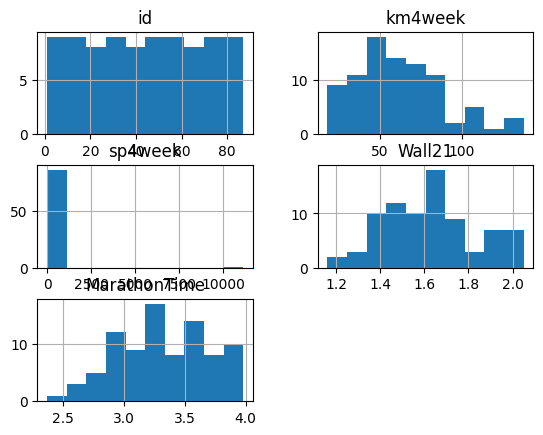

In [36]:
datos_maraton.hist()

In [37]:
datos_maraton

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


Eliminamos las columnas que no nos interesan, como:

El nombre del corredor 
El ID del datp
Y la categoria que da una nota segun como haya sido el tiempo en la carrera 

In [59]:
datos_maraton=datos_maraton.drop(columns=['Name'])
datos_maraton=datos_maraton.drop(columns=['id'])
datos_maraton=datos_maraton.drop(columns=['CATEGORY'])


KeyError: "['Name'] not found in axis"

In [60]:

datos_maraton=datos_maraton.drop(columns=['Marathon'])




datos_maraton.isna().sum()
Nos permite comprobar que datos son nulos, necesitamos que todos los datos del csv tengan un valor, aunque sea 0 

In [61]:
datos_maraton.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

En nuesto caso vamos a pasar los datos nulos a 0 

In [40]:
datos_maraton['CrossTraining'] = datos_maraton['CrossTraining'].fillna(0)

Tambien podemos eliminar las filas que tengan un dato nulo para sacarlo del calculo

In [41]:
datos_maraton=datos_maraton.dropna(how='any')

Los datos de Cross representan las horas de entrenamiento con bicicleta, el problema es que el valor tiene que ser numerico y no puede ser 
ciclista 1h 

In [42]:
datos_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [43]:
valores_cross={"CrossTraining":{'ciclista 1h':1,'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5 }}

datos_maraton.replace(valores_cross, inplace=True)

Con los datos de categoria haremos lo mismo, en vez de datos de:
 
 
 MAM --> 1
 M45 --> 2
 M40 --> 3
 M50 --> 4
 M55 --> 5
 WAM --> 6

In [44]:
datos_maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [45]:
valores_category = {'Category':{'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6}}
datos_maraton.replace(valores_category, inplace=True)

In [46]:
datos_maraton

,Marathon,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,Prague17,1,132.8,14.434783,0,1.16,2.37
1,Prague17,1,68.6,13.674419,0,1.23,2.59
2,Prague17,1,82.7,13.520436,0,1.30,2.66
3,Prague17,2,137.5,12.258544,0,1.32,2.68
4,Prague17,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...,...
82,Prague17,5,50.0,10.830325,0,2.02,3.93
83,Prague17,3,33.6,10.130653,2,1.94,3.93
84,Prague17,3,55.4,11.043189,0,1.94,3.94
85,Prague17,2,33.2,11.066667,0,2.05,3.95


Ahora podemos coger datos y crear graficos y ver si tienen algun tipo de correlacion

1º Eje Y el tiempo de Maraton y eje X

<function matplotlib.pyplot.show(close=None, block=None)>

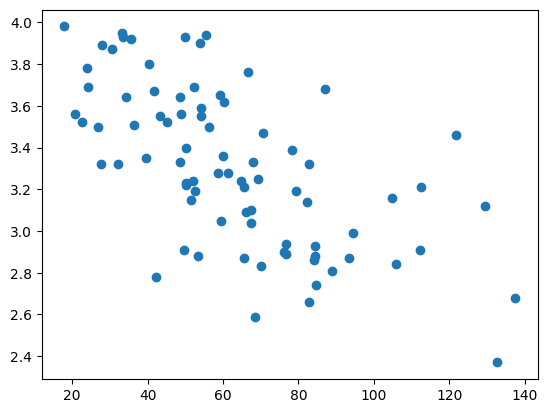

In [47]:
plt.scatter(x=datos_maraton['km4week'], y=datos_maraton['MarathonTime'])
plt.show

Tenemos 1 datos que no nos permite ver bien la correlacion del resto, esto hay que eliminarlo

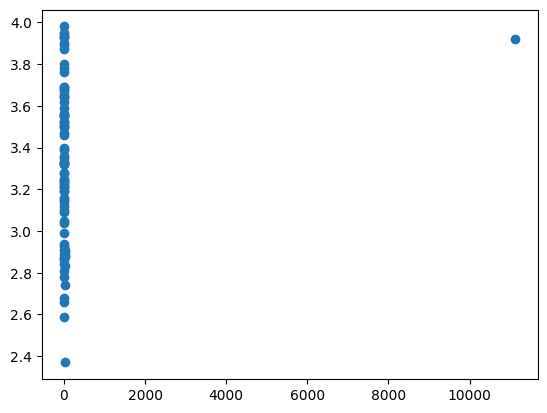

In [48]:
plt.scatter(y=datos_maraton['MarathonTime'], x=datos_maraton['sp4week'])

plt.show()

Como podemos ver nuestro dato erroneo supera los 10000 asi que escribiremos un codigo que nos permita quedarnos con los datos por debajo de 1000

In [49]:
datos_maraton=datos_maraton.query('sp4week<1000')

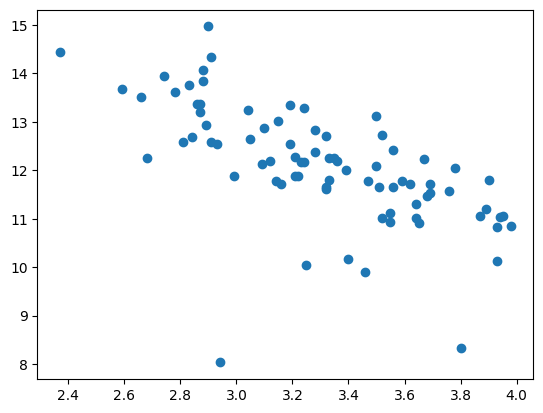

In [51]:
plt.scatter(x=datos_maraton['MarathonTime'], y=datos_maraton['sp4week'])

plt.show()

FASE DE ENTRENAMIENTO

In [62]:
datos_entrenamiento=datos_maraton.sample(frac=0.8, random_state=0)
datos_test=datos_maraton.drop(datos_entrenamiento.index)

In [63]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test=datos_test.pop('MarathonTime')

In [64]:
from sklearn.linear_model import LinearRegression


In [65]:
modelo=LinearRegression()

modelo.fit (datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [67]:
predicciones=modelo.predict(datos_test)

In [70]:
import numpy as np

from sklearn.metrics import mean_squared_error

error=np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual")
print(error*100)


Error porcentual
11.030344733614704
